In [1]:
import iDEA
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import ipywidgets as widgets

l = 5
points = 750
x = np.linspace(0, l, points)
dx = x[1] - x[0]
v_ext = np.zeros(len(x))
v_int = np.zeros([len(x), len(x)])
pib_single = iDEA.system.System(x, v_ext, v_int, electrons = "u")


In [2]:
def wave_function(l, n, X):
    return np.sqrt(2/l) * np.sin((np.pi) * X * (n+1) / l)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import iDEA

import os


def run(l, points, num_of_states):
    # Initialize system
    x = np.linspace(0, l, points)
    dx = x[1] - x[0]
    y = np.linspace(-dx, l+dx, points+2)
    v_ext = np.zeros(len(x))
    v_int = np.zeros([len(x), len(x)])
    pib_single = iDEA.system.System(x, v_ext, v_int, electrons="u")

    orbital_space = []
    analytic_space_1 = []
    analytic_space_2 = []

    for i in range(num_of_states):
        state = iDEA.methods.interacting.solve(pib_single, k=i)
        n = iDEA.observables.density(pib_single, state)
        
        # # Ensure the density goes to zero at the boundaries
        # n[0] = 0
        # n[-1] = 0

        pd_analytic_1 = abs(np.sqrt(2 / l) * np.sin(np.pi * x * (i + 1) / l)) ** 2

        pd_analytic_2 = abs(np.sqrt(2 / (l+2*dx)) * np.sin(np.pi * (y+dx) * (i + 1) / (l + 2*dx))) ** 2
        pd_analytic_2 = pd_analytic_2[1:-1]
        
        orbital_space.append(n)
        analytic_space_1.append(pd_analytic_1)
        analytic_space_2.append(pd_analytic_2)

    # Ensure the directory for saving images exists
    output_dir = 'frames'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    # Define the function to plot the array
    def plot_array(k):
        plt.figure(figsize=(10, 6))
        plt.plot(x, orbital_space[k], "black")
        plt.plot(x, analytic_space_1[k], "b--")
        plt.plot(y[1:-1], analytic_space_2[k], "r--")
        plt.title(f'State {k}')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.grid(True)
        plt.legend(["Approximate prob. density", "Analytical prob. density (l)", "Analytical prob. density (l+2*dx)"])
       
       


        # Check if the arrays are approximately equal
        approx_close_1 = np.allclose(orbital_space[k], analytic_space_1[k], rtol=1e-05, atol=1e-08)
        approx_close_2 = np.allclose(orbital_space[k], analytic_space_2[k], rtol=1e-05, atol=1e-08)
        
        print(f"Is approximate close to analytic 1 for state {k}?: {approx_close_1}")
        print(f"Is approximate close to analytic 2 for state {k}?: {approx_close_2}")

        plt.savefig(os.path.join(output_dir, f'frame_{k:03d}.png'))
        plt.show()
    
    for k in range(len(orbital_space)):
        plot_array(k)

    # Create a slider widget
    slider = widgets.IntSlider(value=0, min=0, max=len(orbital_space) - 1, step=1, description='k:')
    interactive_plot = widgets.interactive(plot_array, k=slider)
    
    # Display the interactive plot
    display(interactive_plot)
    plt.plot(x, (analytic_space_2[0] - orbital_space[0]))
    plt.show()

iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
Is approximate close to analytic 1 for state 0?: False
Is approximate close to analytic 2 for state 0?: False


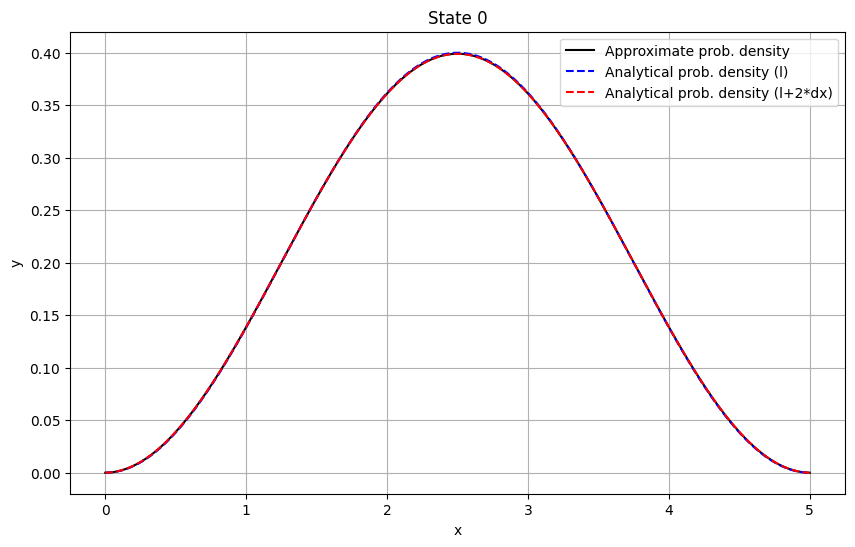

Is approximate close to analytic 1 for state 1?: False
Is approximate close to analytic 2 for state 1?: False


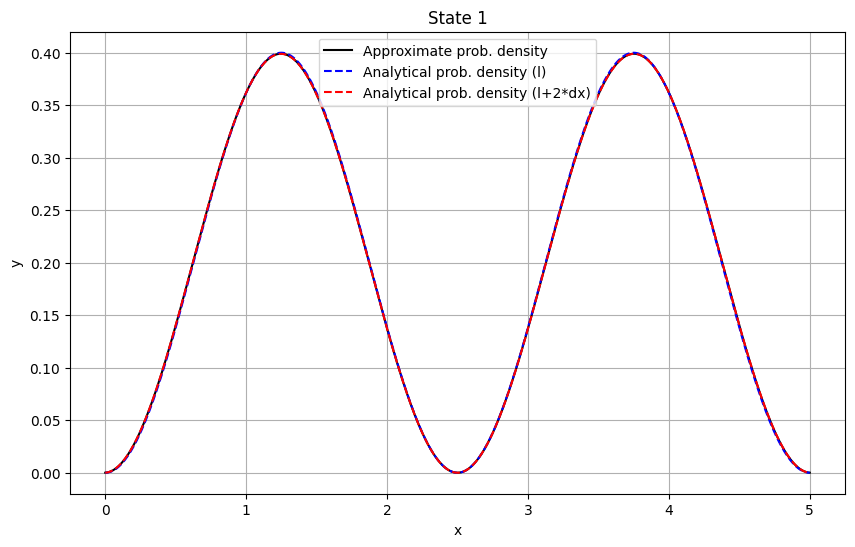

Is approximate close to analytic 1 for state 2?: False
Is approximate close to analytic 2 for state 2?: False


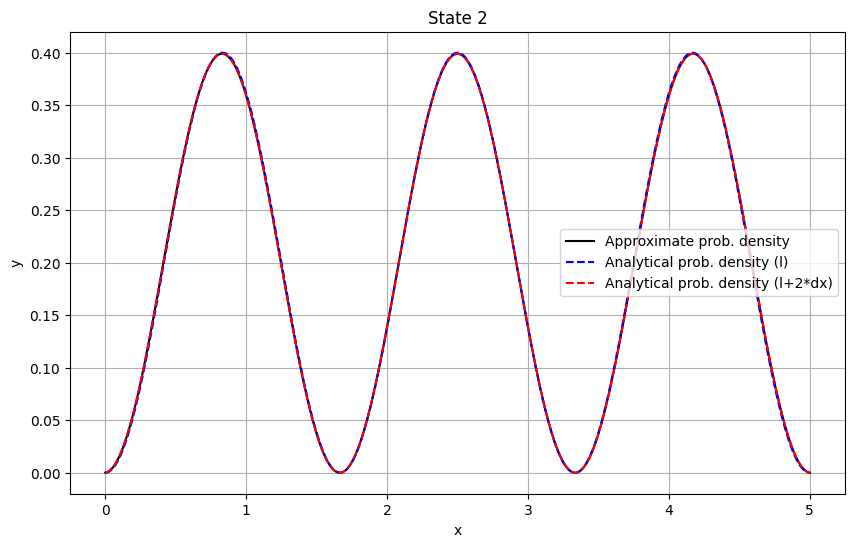

Is approximate close to analytic 1 for state 3?: False
Is approximate close to analytic 2 for state 3?: False


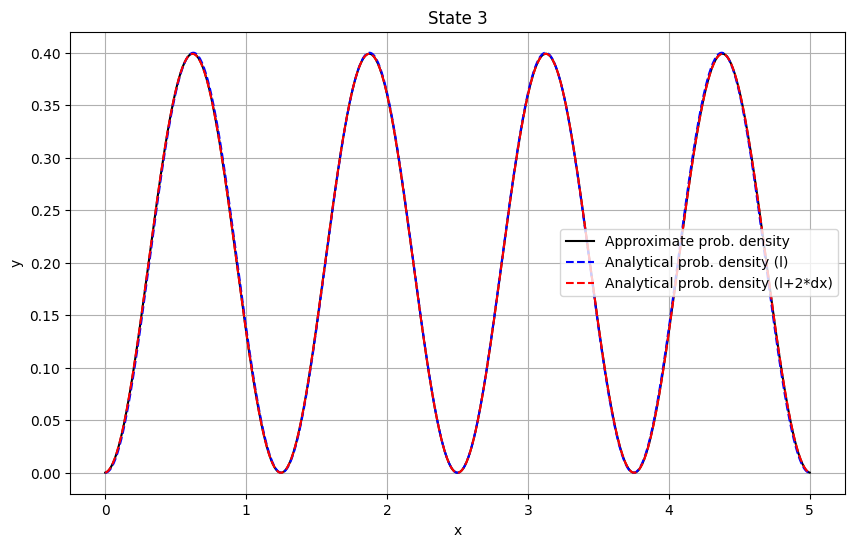

Is approximate close to analytic 1 for state 4?: False
Is approximate close to analytic 2 for state 4?: False


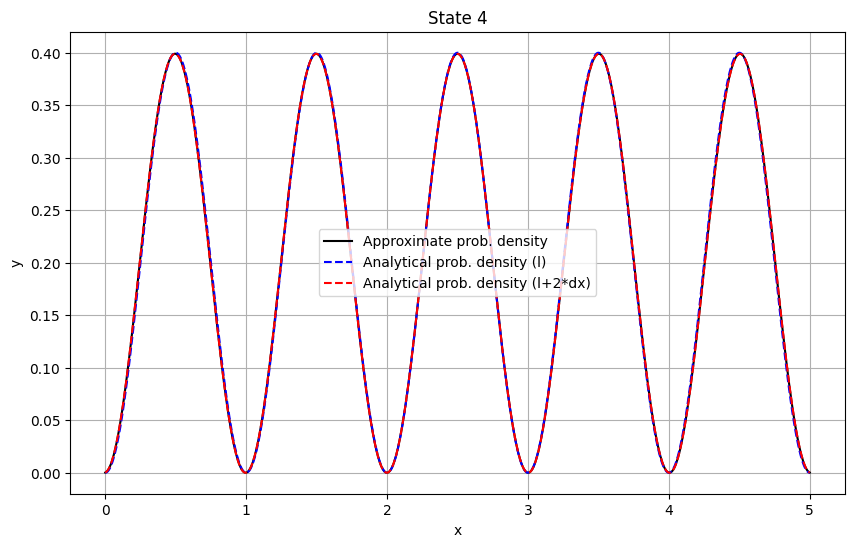

Is approximate close to analytic 1 for state 5?: False
Is approximate close to analytic 2 for state 5?: False


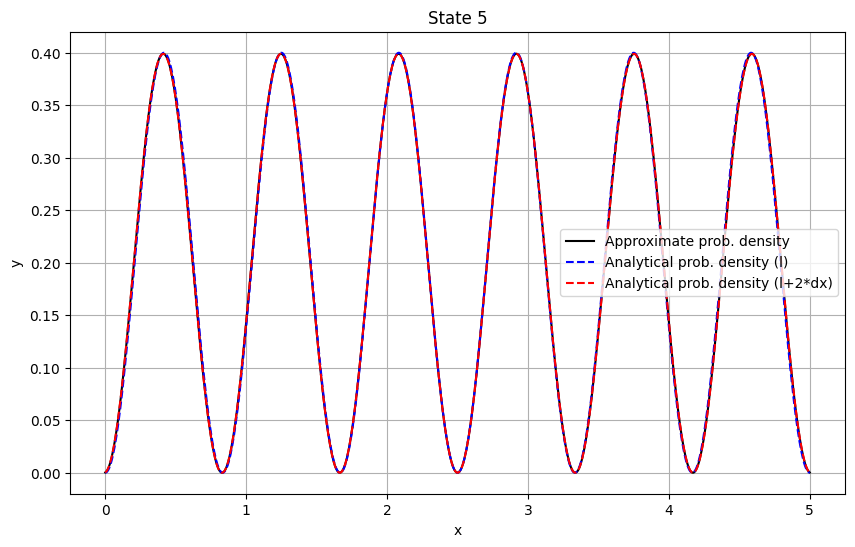

Is approximate close to analytic 1 for state 6?: False
Is approximate close to analytic 2 for state 6?: False


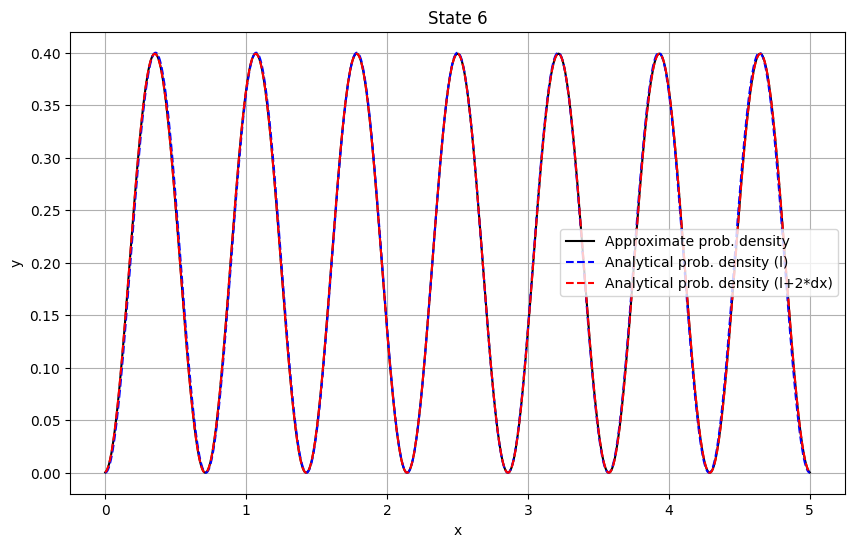

Is approximate close to analytic 1 for state 7?: False
Is approximate close to analytic 2 for state 7?: False


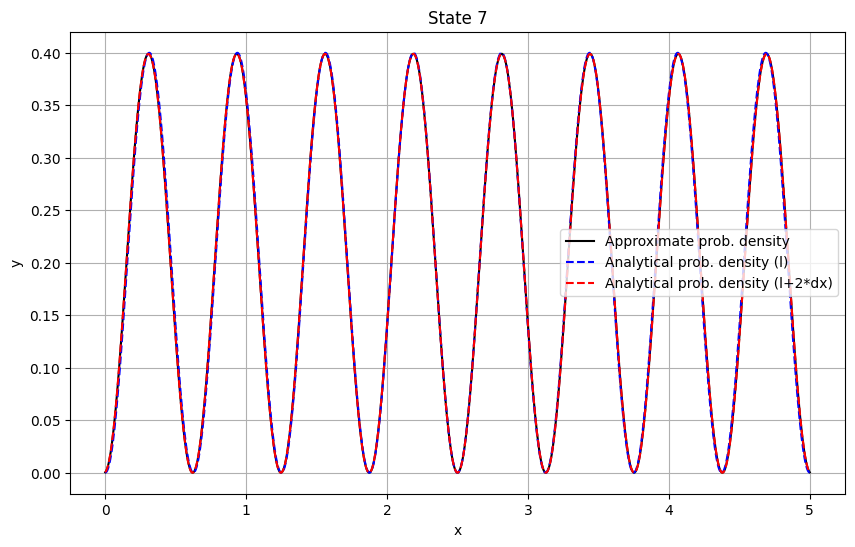

Is approximate close to analytic 1 for state 8?: False
Is approximate close to analytic 2 for state 8?: False


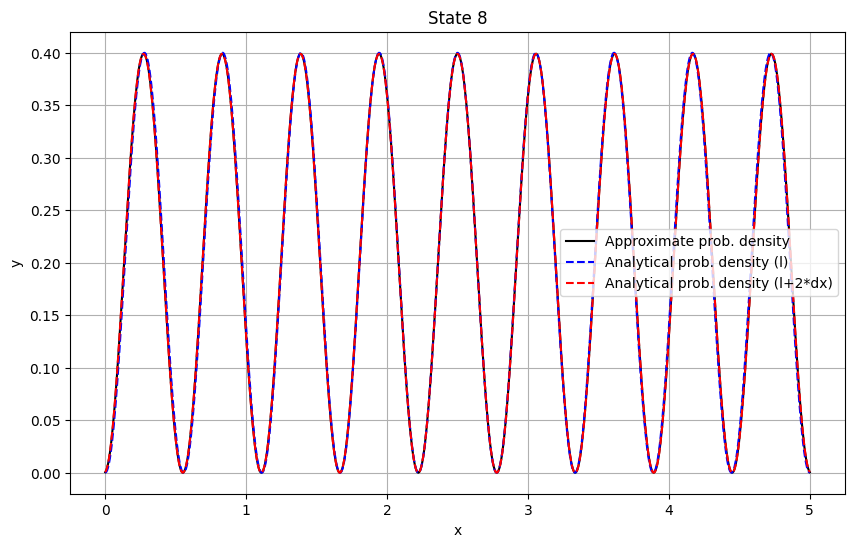

Is approximate close to analytic 1 for state 9?: False
Is approximate close to analytic 2 for state 9?: False


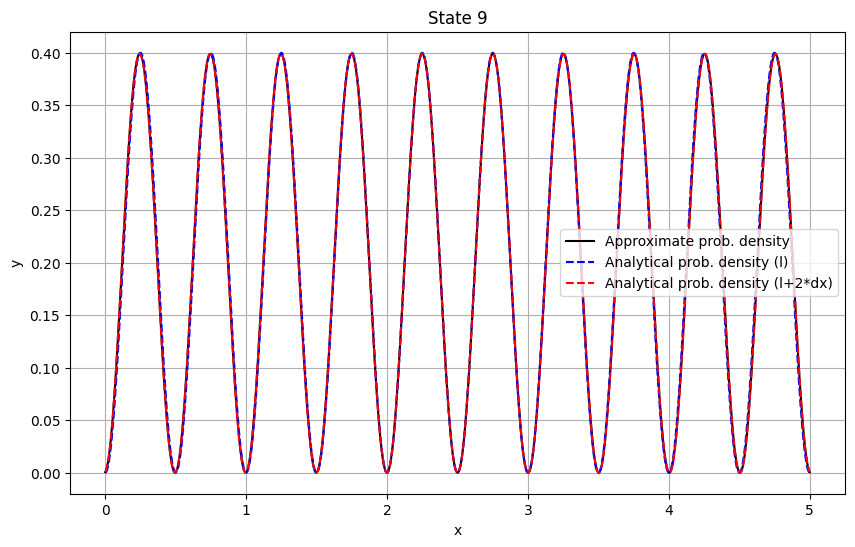

interactive(children=(IntSlider(value=0, description='k:', max=9), Output()), _dom_classes=('widget-interact',…

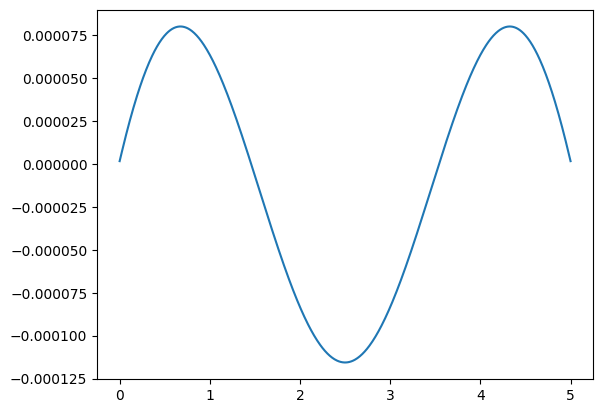

In [5]:
run(5, 750, 10)
